In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Read all data from csv file.

In [3]:
word_association_men = pd.read_csv('EDA_with_Pandas.csv')
word_association_women = pd.read_csv('women_EDA.csv')

In [4]:
cols = ['Загальна кількість реакцій', 'Кількість найчастіших реакцій']
word_association_men.loc[:,cols] = word_association_men.loc[:,cols].ffill()
word_association_men.head()

,Стимул,Реакція,Кількість реакцій,Загальна кількість реакцій,Кількість найчастіших реакцій,Тип асоціації
0,зауваження,вчитель,4,101.0,16.0,слово контексту
1,зауваження,вчителя,4,101.0,16.0,слово контексту
2,зауваження,порада,4,101.0,16.0,синонім
3,зауваження,школа,4,101.0,16.0,слово контексту
4,зауважити,помилку,11,100.0,30.0,слово контексту


In [5]:
type_association = word_association_men['Тип асоціації'].value_counts()
type_association

Тип асоціації
слово контексту    780
синонім            219
антонім             33
Name: count, dtype: int64

In [6]:
num_of_association = word_association_men[word_association_men['Загальна кількість реакцій'].notna()][[
    'Стимул', 'Загальна кількість реакцій', 'Кількість найчастіших реакцій']]
num_of_association

,Стимул,Загальна кількість реакцій,Кількість найчастіших реакцій
0,зауваження,101.0,16.0
1,зауваження,101.0,16.0
2,зауваження,101.0,16.0
3,зауваження,101.0,16.0
4,зауважити,100.0,30.0
...,...,...,...
1027,поміркувати,100.0,18.0
1028,поміч,99.0,31.0
1029,поміч,99.0,31.0
1030,поміч,99.0,31.0


In [8]:
mean_freq = int(num_of_association['Загальна кількість реакцій'].mean())
mean_freq

103

In [9]:
mean_most_freq = int(
    num_of_association['Кількість найчастіших реакцій'].mean())
mean_most_freq

29

In [10]:
stimul_above_mean = num_of_association[num_of_association['Кількість найчастіших реакцій'] > mean_most_freq][[
    'Стимул', 'Кількість найчастіших реакцій']]
stimul_above_mean

,Стимул,Кількість найчастіших реакцій
4,зауважити,30.0
5,зауважити,30.0
6,зауважити,30.0
7,зауважити,30.0
8,зауважити,30.0
...,...,...
1020,помаранчевий,41.0
1028,поміч,31.0
1029,поміч,31.0
1030,поміч,31.0


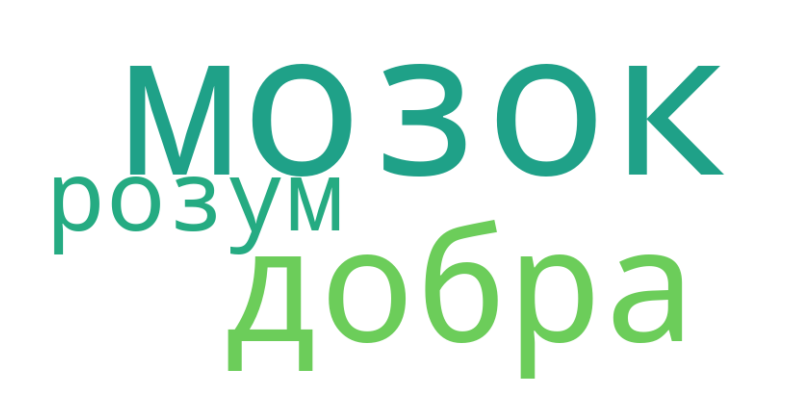

In [41]:
specific_word = "памʼять"
filtered_data = word_association_men[word_association_men['Стимул'].str.contains(
    specific_word, na=False)]

weighted_text = ' '.join((row['Реакція'] + ' ') * row['Кількість реакцій']
                         for _, row in filtered_data.iterrows())

wordcloud = WordCloud(width=800, height=400,
                      background_color='white').generate(weighted_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
the_most_frequent_reactions_of_men = word_association_men.groupby(['Реакція', 'Стимул'], as_index=False)['Кількість реакцій']\
                                    .sum().sort_values(by='Кількість реакцій', ascending=False).set_index('Стимул')
the_most_frequent_reactions_of_men.head()

,Реакція,Кількість реакцій
Стимул,,
неприємний,запах,43
калина,червона,41
пізнати,себе,41
питання,відповідь,40
країна,Україна,39


In [66]:
the_most_frequent_reactions_of_women = word_association_women.groupby(['Реакція', 'Стимул'], as_index=False)['Кількість реакцій']\
                                    .sum().sort_values(by='Кількість реакцій', ascending=False).set_index('Стимул')
the_most_frequent_reactions_of_women.head()

,Реакція,Кількість реакцій
Стимул,,
завтрашній,день,85
сьогоднішній,день,74
заробити,гроші,70
заробляти,гроші,69
вірний,друг,62
